In [42]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt

In [43]:
# Load dataset
df = pd.read_csv( 'dataset/train.csv' )
# Seleção de Features
# Características
features = ['idade', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
# Variável alvo
label = ['saldo_atual']
# Dados de treinamento e teste
x_train = df.loc[:, features]
y_train = df.loc[:, label]
# Treinamento do algoritmo
lr_model = LinearRegression()
lr_model.fit( x_train, y_train )

# Previsão do algoritmo
y_pred = lr_model.predict( x_train )
# Resultado final
df1 = df.loc[:, ['id_cliente', 'saldo_atual']]
df1['predicted'] = y_pred
df1.head()

,id_cliente,saldo_atual,predicted
0,1767,278.172008,346.669549
1,11920,268.874152,367.840277
2,8910,446.643127,431.468979
3,4964,321.141267,445.506463
4,10100,428.716114,378.271169


## AULA 22 - R elevado a 2 na prática


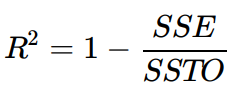

In [11]:
# 1.0 Load dataset
df = pd.read_csv( 'dataset/train.csv' )
# 2.0 Seleção de Features
features = ['idade', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = ['saldo_atual']
x_train = df.loc[:, features]
y_train = df.loc[:, label]
# 3.0 Model Training
lr_model = LinearRegression()
lr_model.fit( x_train, y_train )
y_pred = lr_model.predict( x_train )
df1 = df.loc[:, ['id_cliente', 'saldo_atual']]
df1['predicted'] = y_pred
# 4.0 Model Performance
r2_squared = np.round( 100*mt.r2_score( y_train, y_pred ), 5)
print( 'R2 square: {}%'.format( r2_squared ) )
# 5.0 Conclusão
print( '{}% da variação da variável alvo y é reduzida, levando em consideração o preditor'.format( r2_squared ) )
print( '{}% da variação da variável alvo y é “explicada pela variação do preditor x'.format( r2_squared ) )


R2 square: 16.91736%
16.91736% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.91736% da variação da variável alvo y é “explicada pela variação do preditor x


## AULA 23 -  MSE (Mean Square Error) Erro médio quadrádico -  calcula em uma única métrica o qual próximo foi a estimativa aos dados reais. 
Desvantagem  - outilier influência muito.
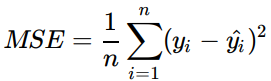

In [12]:

## 4.2 MSE
mse = np.round( mt.mean_squared_error( y_train, y_pred ) , 2 )
print( 'A cada previsão, o erro médio é de: U${}'.format( mse ) )
# 5.0 Conclusão
print( '{}% da variação da variável alvo y é reduzida, levando em consideração o preditor'.format( r2_squared ) )
print( '{}% da variação da variável alvo y é “explicada pela variação do preditor x'.format( r2_squared ) )

A cada previsão, o erro médio é de: U$39370.27
16.91736% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.91736% da variação da variável alvo y é “explicada pela variação do preditor x


## AULA 24 - O RMSE (Root Mean Square Error)
é uma medida de performance do modelo na mesma escala da variável alvo

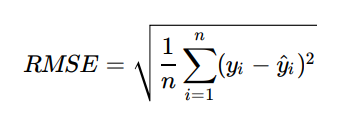

In [13]:
## 4.3 RMSE
rmse = np.sqrt( mse )
print( 'A cada previsão, o erro médio é de: U${}'.format( rmse ) )
# 5.0 Conclusão
print( '{}% da variação da variável alvo y é reduzida, levando em consideração o preditor'.format( r2_squared ) )
print( '{}% da variação da variável alvo y é “explicada pela variação do preditor x'.format( r2_squared ) )


A cada previsão, o erro médio é de: U$198.41942949217446
16.91736% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.91736% da variação da variável alvo y é “explicada pela variação do preditor x


## AULA 25 - EXERCÍCIOS

Exercícios
1. Rafaça o código de treinamento da aula 19: “Linear Regression - Prática”
no seu computador usando o Jupyter Notebook ou o Google Colabs e compute
o R2, o MSE e o RMSE 
R: (FEITO)
2. Qual o problema principal de usar a métrica MSE? Escreve um exemplo
hipotético, no qual o problema acontece. 
R: Existem dois principais problemas, primeiro em relação aos outiliers, ele conseguem influênciar muito bem a métrica, levando a erro. Outro problema é que o resultado não está de acordo com escala original impossibilitando a comparação. 



3. Explique com um pequeno texto ilustrando o benefício de usar a métrica
RMSE. ´
R: É uma métrica que vai retorna o valor na escala do original. 



4. Modifique 5% das linhas de algumas colunas, adicionando outliers e
refaça as métricas de R2, MSE e RMSE.



In [14]:
x_train = df.loc[:, features]
y_train = df.loc[:, label]


In [26]:
x_train.loc[10,'idade'] 

33

In [101]:
# Alaterando 5% da coluna idade para outlier

from random import randint
def ajust(quantity):
    # quantidade a ser alterada em %%!
    quantity = quantity/100
    x_train = df.loc[:, features]
    y_train = df.loc[:, label]
    change = int(quantity*len(x_train))
    
    numeros = []  # Lista para armazenar os números
    while len(numeros) < change:
        numero_aleatorio = randint(1, change)  # Gere um número aleatório entre 1 e 20
        if numero_aleatorio not in numeros:
            numeros.append(numero_aleatorio)

    #print(numeros)
    for i in numeros:
        x_train.loc[i,'num_emprestimos'] = 20
        x_train.loc[i,'idade'] = 90
    return (x_train)

In [103]:
s = ajust(5)

In [104]:
s

,idade,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros
0,21,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15
1,90,2465.39,19227.37796,69.858778,36.917093,20,8,5,40,23,10,18
2,90,1055.29,42822.28223,134.201478,34.561714,20,3,6,26,13,3,15
3,90,703.05,51786.82600,297.350067,31.493561,20,3,7,12,7,2,1
4,90,891.29,44626.85346,134.201478,28.028887,20,8,7,24,10,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9495,29,157.98,32624.67754,237.739275,32.407322,100,4,4,24,15,1,14
9496,1237,805.43,49024.15700,118.883577,23.632195,0,4,7,10,11,2,3
9497,47,2250.42,42200.88978,134.201478,34.623576,4,4,4,13,8,4,24
9498,42,505.37,35391.32289,245.498881,28.758818,3,7,6,24,13,3,11


In [106]:
def bateria(x_train):
    x_train = x_train
    lr_model = LinearRegression()
    lr_model.fit( x_train, y_train )
    y_pred = lr_model.predict( x_train )
    df1 = df.loc[:, ['id_cliente', 'saldo_atual']]
    df1['predicted'] = y_pred
    # 4.0 Model Performance
    ## 4.1 R squared
    r2_squared = np.round( 100*mt.r2_score( y_train, y_pred ), 2 )
    print( 'R2 square: {}%'.format( r2_squared ) )
    ## 4.2 MSE
    mse = np.round( mt.mean_squared_error( y_train, y_pred ) , 2 )
    print( 'A cada previsão, o erro médio é de: U${}'.format( mse ) )
    ## 4.3 RMSE
    rmse = np.sqrt( mse )
    print( 'A cada previsão, o erro médio é de: U${}'.format( rmse ) )
    # 5.0 Conclusão
    print( '{}% da variação da variável alvo y é reduzida, levando em consideração o preditor'.format( r2_squared ) )
    print( '{}% da variação da variável alvo y é “explicada pela variação do preditor x'.format( r2_squared ) )

In [66]:

bateria(ajust(5))



[78, 222, 43, 35, 164, 313, 48, 327, 242, 19, 30, 32, 67, 298, 289, 338, 187, 389, 424, 330, 396, 86, 447, 359, 135, 22, 426, 282, 186, 133, 228, 471, 416, 218, 454, 410, 195, 248, 441, 472, 349, 92, 320, 250, 34, 129, 126, 268, 295, 235, 384, 14, 147, 379, 261, 306, 161, 174, 362, 267, 363, 182, 66, 386, 371, 450, 392, 53, 278, 366, 404, 140, 201, 323, 468, 309, 54, 97, 264, 324, 38, 79, 158, 334, 351, 82, 212, 193, 326, 125, 420, 176, 217, 142, 169, 3, 119, 239, 260, 380, 299, 463, 395, 44, 285, 93, 27, 443, 238, 300, 191, 344, 57, 356, 280, 244, 166, 350, 224, 114, 75, 206, 316, 400, 137, 390, 434, 339, 439, 165, 51, 423, 403, 237, 170, 180, 205, 144, 56, 207, 105, 84, 184, 312, 40, 308, 95, 160, 364, 74, 332, 286, 305, 111, 47, 465, 331, 31, 106, 429, 33, 440, 284, 223, 375, 357, 269, 453, 296, 96, 76, 469, 473, 325, 377, 315, 122, 401, 83, 413, 263, 321, 378, 200, 265, 80, 139, 121, 271, 101, 262, 108, 449, 342, 109, 407, 279, 4, 310, 69, 23, 419, 5, 98, 432, 241, 345, 255, 318, 6


5. Faça a seguinte bateria de testes
5.1 Refaça o exercícios 4 com as seguintes quantidade de outliers: 2%,
5%, 10%, 20% e 30%.

In [107]:
bateria(ajust(2))

R2 square: 16.92%
A cada previsão, o erro médio é de: U$39369.99
A cada previsão, o erro médio é de: U$198.41872391485637
16.92% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.92% da variação da variável alvo y é “explicada pela variação do preditor x


In [108]:
bateria(ajust(5))

R2 square: 16.92%
A cada previsão, o erro médio é de: U$39369.87
A cada previsão, o erro médio é de: U$198.41842152380914
16.92% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.92% da variação da variável alvo y é “explicada pela variação do preditor x


In [109]:
bateria(ajust(10))

R2 square: 16.92%
A cada previsão, o erro médio é de: U$39367.46
A cada previsão, o erro médio é de: U$198.41234840604048
16.92% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.92% da variação da variável alvo y é “explicada pela variação do preditor x


In [110]:
bateria(ajust(20))

R2 square: 16.96%
A cada previsão, o erro médio é de: U$39351.04
A cada previsão, o erro médio é de: U$198.3709656174512
16.96% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.96% da variação da variável alvo y é “explicada pela variação do preditor x


In [111]:
bateria(ajust(30))

R2 square: 16.95%
A cada previsão, o erro médio é de: U$39352.93
A cada previsão, o erro médio é de: U$198.37572936223827
16.95% da variação da variável alvo y é reduzida, levando em consideração o preditor
16.95% da variação da variável alvo y é “explicada pela variação do preditor x
